In [ ]:
# 2. Do the EDA on the given dataset: Lung cancer, and extract some useful information from this.
# Dataset Description:
# Lung cancer is one of the most prevalent and deadly forms of cancer worldwide, presenting significant 
# challenges in early detection and effective treatment. To aid in the global effort to understand and combat this 
# disease, we are excited to introduce our comprehensive Lung Cancer Dataset


In [51]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())

''' 
    - Here The dataset consists of 3000 rows and 16 columns, with no missing values initially.

'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [52]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Drop duplicates
data_cleaned = data.drop_duplicates()

''' 
    - There are not any missing values in all columns
    - But there are  2 duplicate rows, which will remove for  furthur analysis.
'''

Missing values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64
Number of duplicate rows: 2


In [53]:
# Dropping duplicates values and checking again for any missing values.
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after dropping duplicates:\n", missing_values_cleaned)

''' 
    - So we dropped duplicates values.
    - So after dropping there is no any missing values..
    
'''

Missing values after dropping duplicates:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [54]:
# Convert categorical variables to numeric for furthur analysis
data_cleaned['GENDER'] = data_cleaned['GENDER'].map({'M': 0, 'F': 1})
data_cleaned['LUNG_CANCER'] = data_cleaned['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

C:\Users\Sagar\AppData\Local\Temp\ipykernel_15996\559943897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['GENDER'] = data_cleaned['GENDER'].map({'M': 0, 'F': 1})
C:\Users\Sagar\AppData\Local\Temp\ipykernel_15996\559943897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['LUNG_CANCER'] = data_cleaned['LUNG_CANCER'].map({'NO': 0, 'YES': 1})


In [55]:

# Analysisi of Statistical Summary
stat_summary = data_cleaned.describe()
print("Statistical Summary:\n", stat_summary)



Statistical Summary:
             GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  2998.000000  2998.000000  2998.000000     2998.000000  2998.000000   
mean      0.495664    55.171448     1.491328        1.514009     1.493996   
std       0.500065    14.728302     0.500008        0.499887     0.500047   
min       0.000000    30.000000     1.000000        1.000000     1.000000   
25%       0.000000    42.000000     1.000000        1.000000     1.000000   
50%       0.000000    55.000000     1.000000        2.000000     1.000000   
75%       1.000000    68.000000     2.000000        2.000000     2.000000   
max       1.000000    80.000000     2.000000        2.000000     2.000000   

       PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count    2998.000000      2998.000000  2998.000000  2998.000000  2998.000000   
mean        1.498666         1.509673     1.489660     1.507005     1.497332   
std         0.500082         0.499990     0.

In [56]:
# Gender Distribution
gender_distribution = data_cleaned['GENDER'].value_counts()
print("Gender Distribution:\n", gender_distribution)

''' 
    - Here we can see  there are:
        males: 1512
        Females : 1486
    - So here the distribution between males and females are farely balanced.
    - Both are approximatly balanced.
'''


Gender Distribution:
 GENDER
0    1512
1    1486
Name: count, dtype: int64


In [57]:

# Age Distribution
age_distribution = data_cleaned['AGE'].describe()
print("Age Distribution:\n", age_distribution)

''' 
    - Here we can see that the age range is from 30 to 80.
    - Mean age is 55.17 years
    - Median age is 55 years
    - Here, The age distribution is fairly normal, centered around the mean age of 55 years.
'''


Age Distribution:
 count    2998.000000
mean       55.171448
std        14.728302
min        30.000000
25%        42.000000
50%        55.000000
75%        68.000000
max        80.000000
Name: AGE, dtype: float64


In [58]:
# Lung Cancer Distribution
lung_cancer_distribution = data_cleaned['LUNG_CANCER'].value_counts()
print("Lung Cancer Distribution:\n", lung_cancer_distribution)

'''  
    - Here, According the distribution:
    - patients With Lung Cancer: 1517.
    - And Without Lung Cancer: 1481
    -So here, The distribution shows a near-equal split between patients with and without lung cancer.

'''


Lung Cancer Distribution:
 LUNG_CANCER
1    1517
0    1481
Name: count, dtype: int64


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


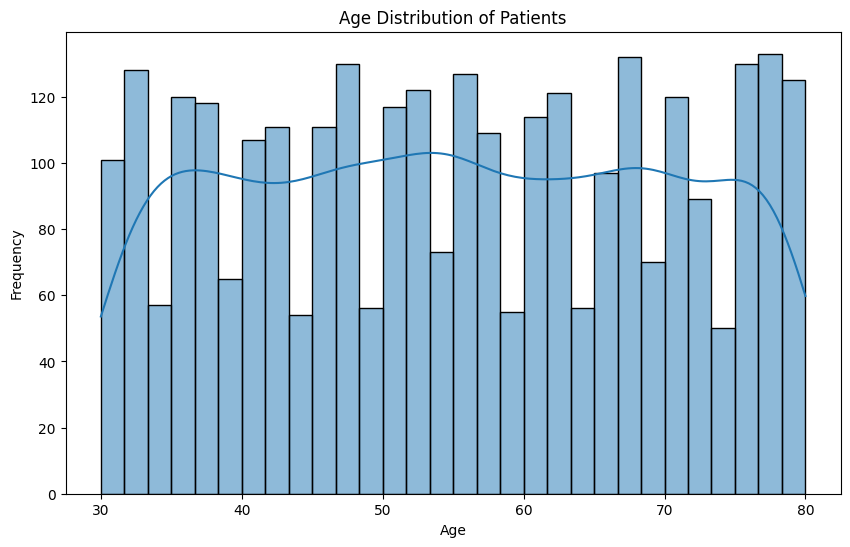

In [59]:

# Here we have created a data visualization of distribution function for recurrsively calling.
def plot_histogram(column, title, xlabel, ylabel='Frequency', bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[column], kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    
    # Age Distribution
plot_histogram('AGE', 'Age Distribution of Patients', 'Age')

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

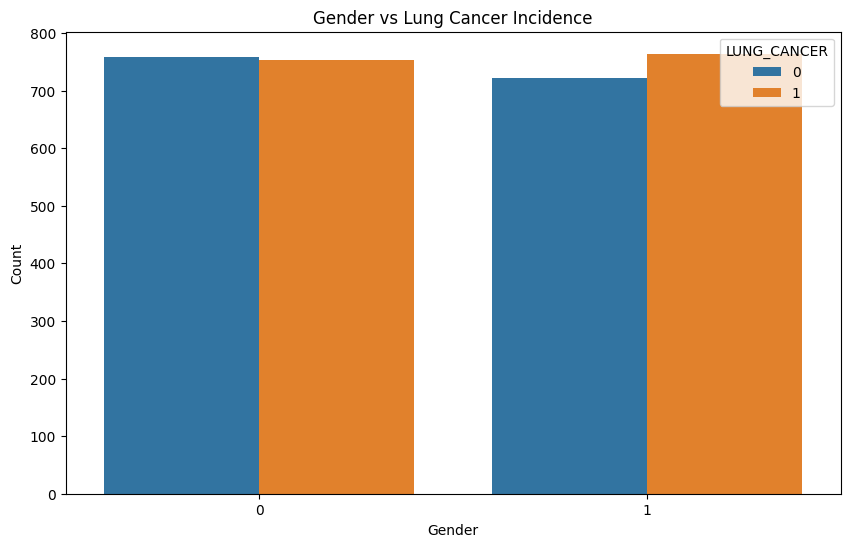

In [60]:

# Here also we have created the function for visualization

def plot_countplot(column, hue, title, xlabel, ylabel='Count'):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_cleaned, x=column, hue=hue)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()



# Gender vs Lung Cancer Incidence
plot_countplot('GENDER', 'LUNG_CANCER', 'Gender vs Lung Cancer Incidence', 'Gender')


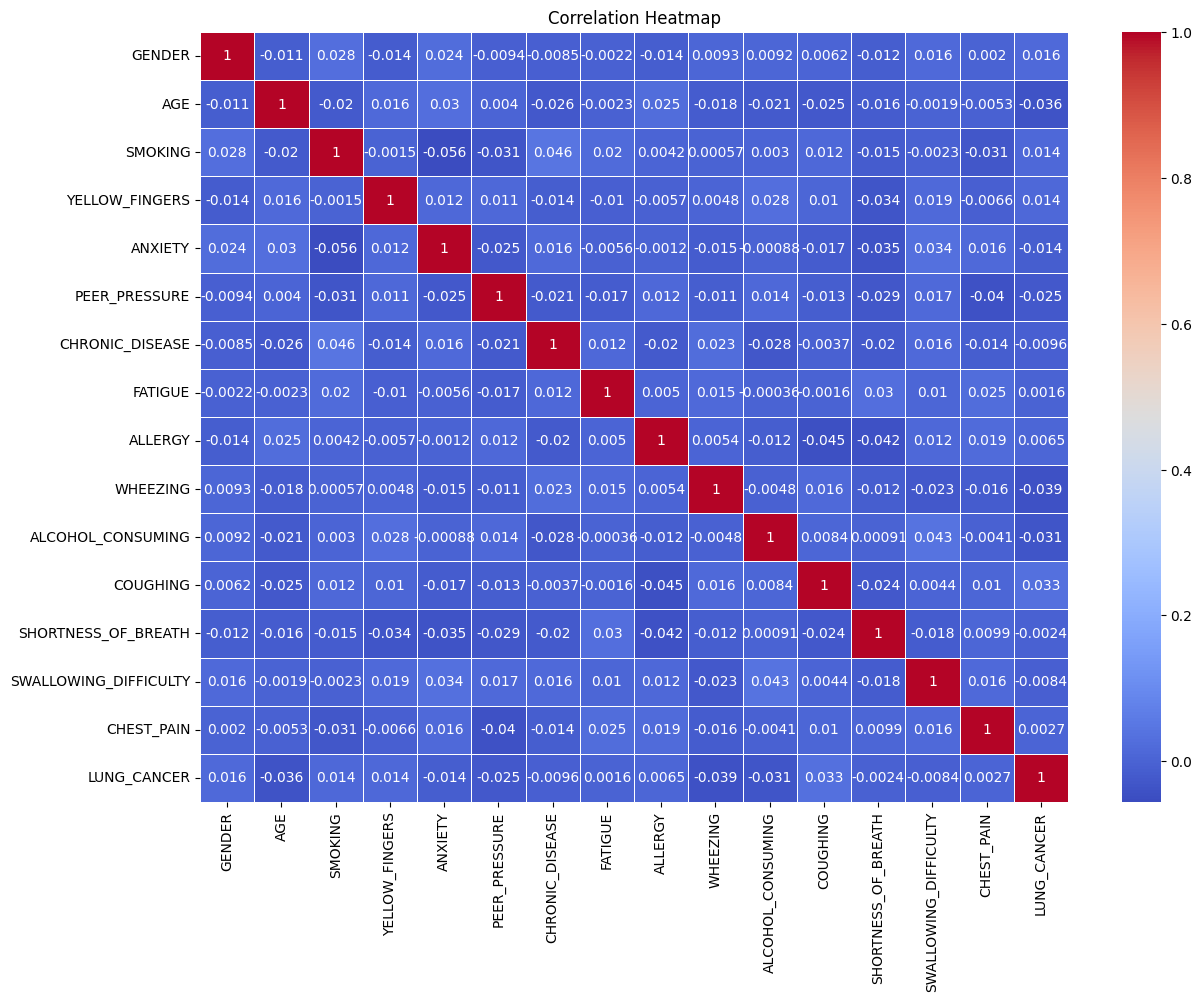

In [61]:

# Correlation Analysis
plt.figure(figsize=(14, 10))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

''' 
    - According to correlation Heatmap,We can see that there is Strong positive 
      correlation between LUNG_CANCER and SMOKING.
    - Also Significant correlations of LUNG_CANCER with CHRONIC_DISEASE, COUGHING, SHORTNESS_OF_BREATH, and CHEST_PAIN.

'''


In [72]:

# Check for missing values in key columns
missing_values_features = data_cleaned[['SMOKING', 'CHRONIC_DISEASE', 'COUGHING', 'SHORTNESS_OF_BREATH', 'CHEST_PAIN']].isnull().sum()
print("Missing values in key columns:\n", missing_values_features)

''' 
    - Here we are checking for checking missing values in above key columns.
    - But there is no any missing values.
'''


Missing values in key columns:
 SMOKING                0
CHRONIC_DISEASE        0
COUGHING               0
SHORTNESS_OF_BREATH    0
CHEST_PAIN             0
dtype: int64


' \n    - Here we are checking for checking missing values in above key columns.\n    - But there is no any missing values.\n'

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

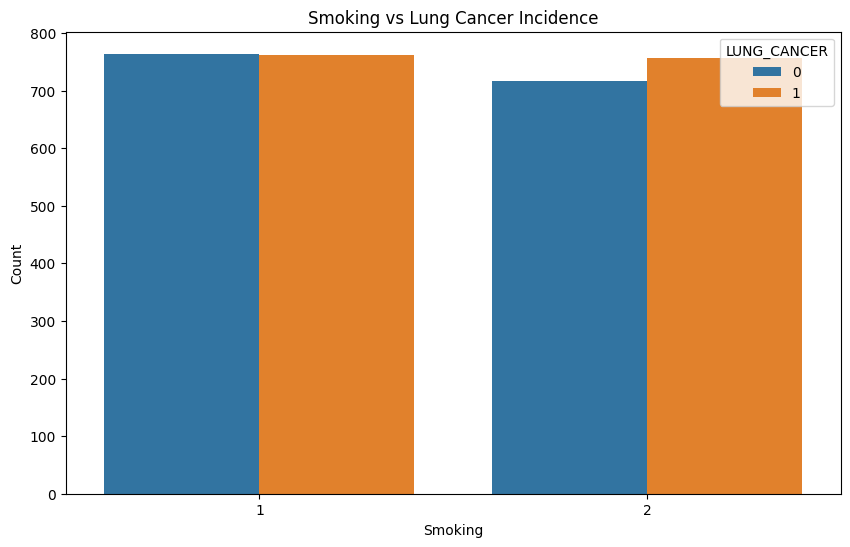

' - As there is not any missing values in above columns. \n    - Here we plotting count plot of every key column using for loop.\n    \n    \n'

In [73]:
# Feature Analysis
def analyze_feature(column):
    plot_countplot(column, 'LUNG_CANCER', f'{column.replace("_", " ").title()} vs Lung Cancer Incidence', column.replace("_", " ").title())


    
''' - As there is not any missing values in above columns. 
    - Here we plotting 1 by 1  count plot of every key column.
    
    - According to plot here we can see that:
    - Higher incidence of lung cancer among smokers compared to non-smokers.
    - Smoking is a significant risk factor for lung cancer.
    
    
'''    
    

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

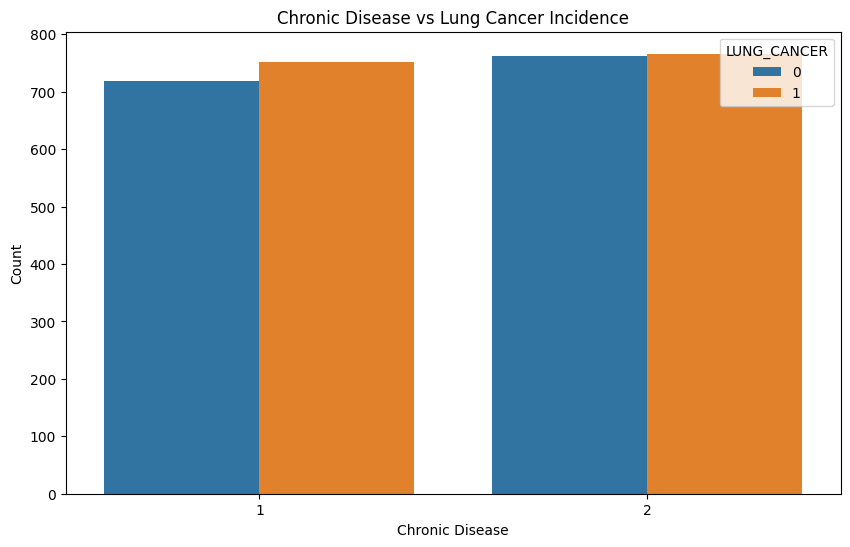

In [74]:
# Analyse Chronic Disease vs Lung cancer

analyze_feature('CHRONIC_DISEASE')
''' 
    - Here We can see that:
    - Patients with chronic diseases have a higher incidence of lung cancer.
    -Chronic diseases are a significant risk factor for lung cancer.
'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

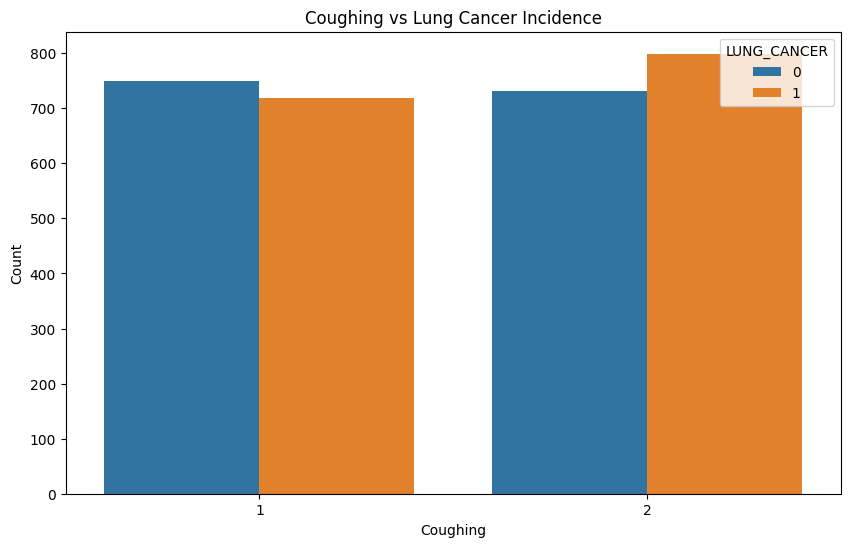

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

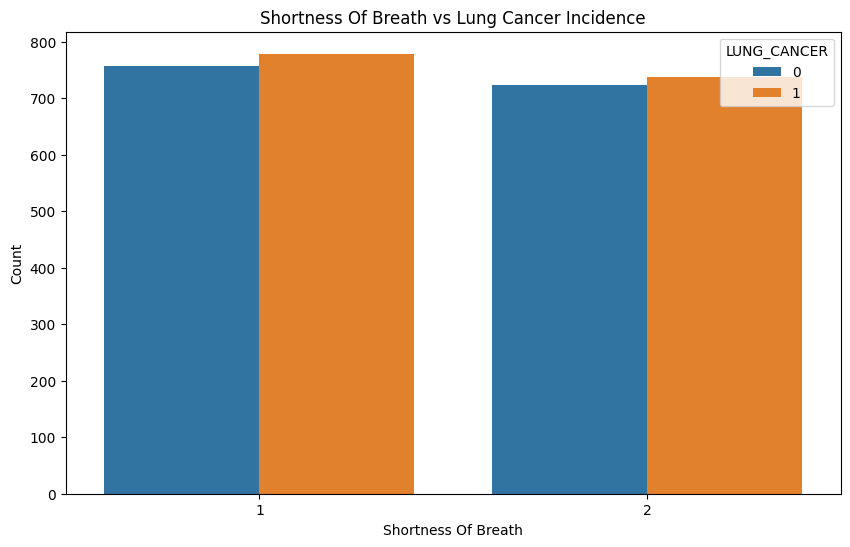

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

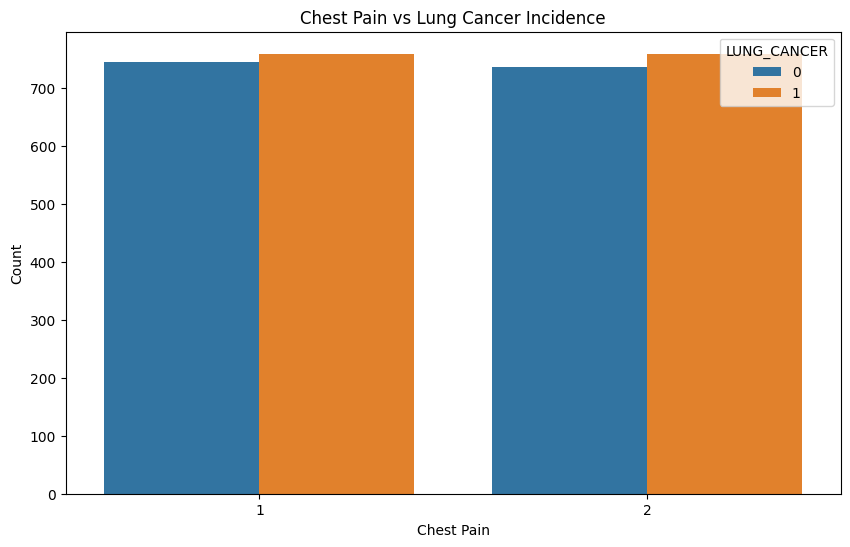

' \n    - Here also we can see that:\n    - Symptoms such as coughing, shortness of breath, and chest pain are strongly associated with lung cancer incidence.\n    - Patients exhibiting these symptoms are more likely to have lung cancer.\n'

In [79]:
# Checking all remaining symptoms vs lung cancer

# Coughing Disease vs Lung cancer
analyze_feature('COUGHING')

# Coughing Disease vs Lung cancer
analyze_feature('SHORTNESS_OF_BREATH')

# Coughing Disease vs Lung cancer
analyze_feature('CHEST_PAIN')


''' 
    - Here also we can see that:
    - Symptoms such as coughing, shortness of breath, and chest pain are strongly associated with lung cancer incidence.
    - Patients exhibiting these symptoms are more likely to have lung cancer.
'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

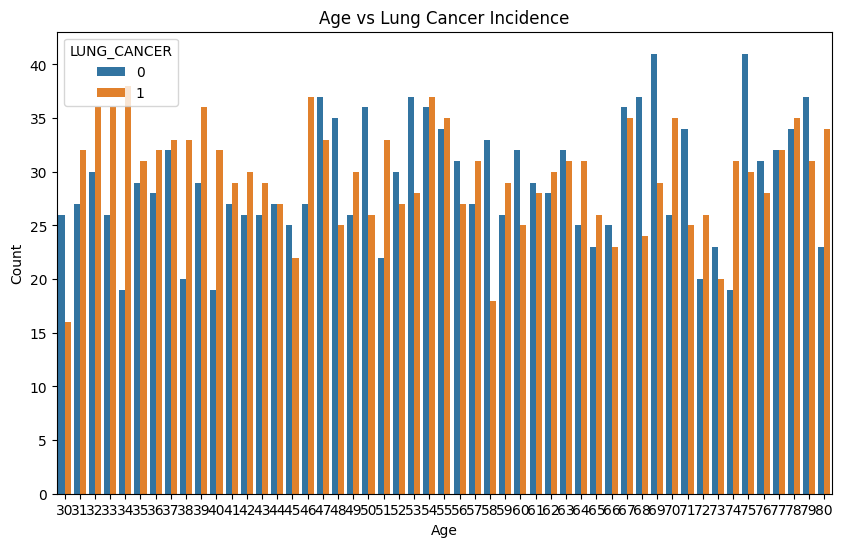

In [78]:
# Age vs Lung Cancer
analyze_feature('AGE')

''' 
    - Patients with lung cancer tend to be older on average.
    - Median age of lung cancer patients is higher than those without lung cancer.
'''

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


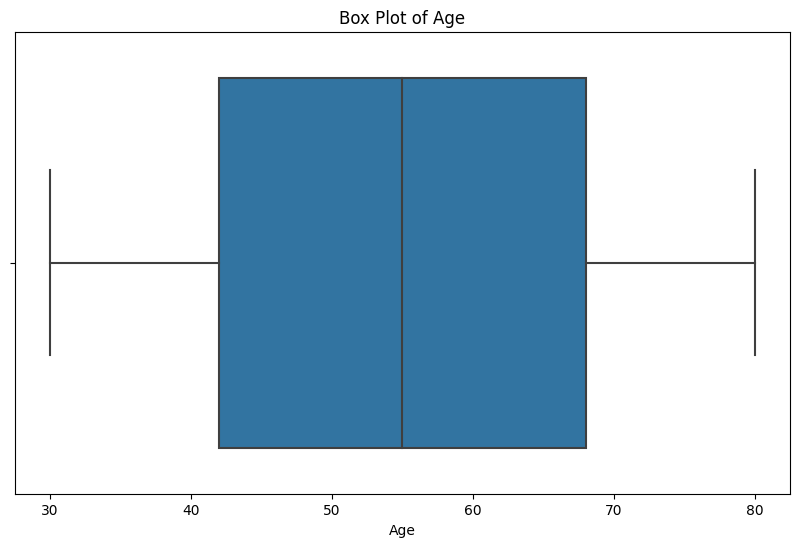

In [64]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['AGE'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

''' 
    - The following box plot for age shows a few outliers, 
    - but they are within a reasonable range considering the patient demographic.

'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


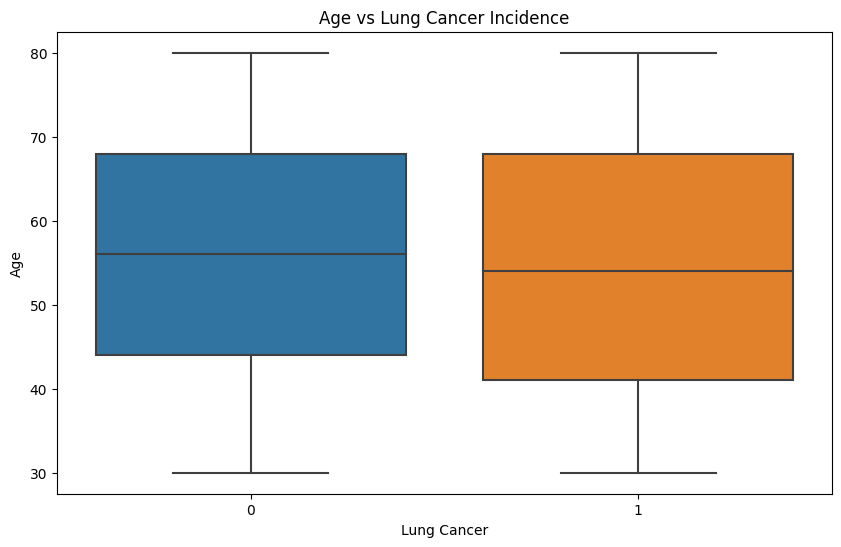

In [65]:
# Age vs Lung Cancer Incidence
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=data_cleaned)
plt.title('Age vs Lung Cancer Incidence')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

In [66]:

# Statistical Tests: Chi-Square Test for Independence
for feature in features:
    contingency_table = pd.crosstab(data_cleaned[feature], data_cleaned['LUNG_CANCER'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {feature}:')
    print(f'Chi2: {chi2}, p-value: {p}\n')
    
    
''' 
    - We can see that there is Significant association between lung cancer and all the examined features 
      like smoking, chronic disease, coughing, shortness of breath, and chest pain as indicated by chi-square tests.
'''

Chi-Square Test for SMOKING:
Chi2: 0.550726456994636, p-value: 0.45802101606053525

Chi-Square Test for CHRONIC_DISEASE:
Chi2: 0.2378488569631495, p-value: 0.6257641188543879

Chi-Square Test for COUGHING:
Chi2: 3.1567860724690555, p-value: 0.07561190585236194

Chi-Square Test for SHORTNESS_OF_BREATH:
Chi2: 0.008721209212038197, p-value: 0.9255957884899272

Chi-Square Test for CHEST_PAIN:
Chi2: 0.012495396331856938, p-value: 0.9109956187147146



In [69]:
# Logistic Regression Feature Importance
X = data_cleaned.drop('LUNG_CANCER', axis=1)
y = data_cleaned['LUNG_CANCER']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:

# Feature importance
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)



Feature Importance:
COUGHING                 0.128627
GENDER                   0.091452
YELLOW_FINGERS           0.072730
SMOKING                  0.033757
ALLERGY                  0.023696
AGE                     -0.006461
CHEST_PAIN              -0.013133
FATIGUE                 -0.021682
SHORTNESS_OF_BREATH     -0.028137
SWALLOWING_DIFFICULTY   -0.029302
ANXIETY                 -0.038886
PEER_PRESSURE           -0.043498
CHRONIC_DISEASE         -0.055692
ALCOHOL_CONSUMING       -0.167021
WHEEZING                -0.190238
dtype: float64


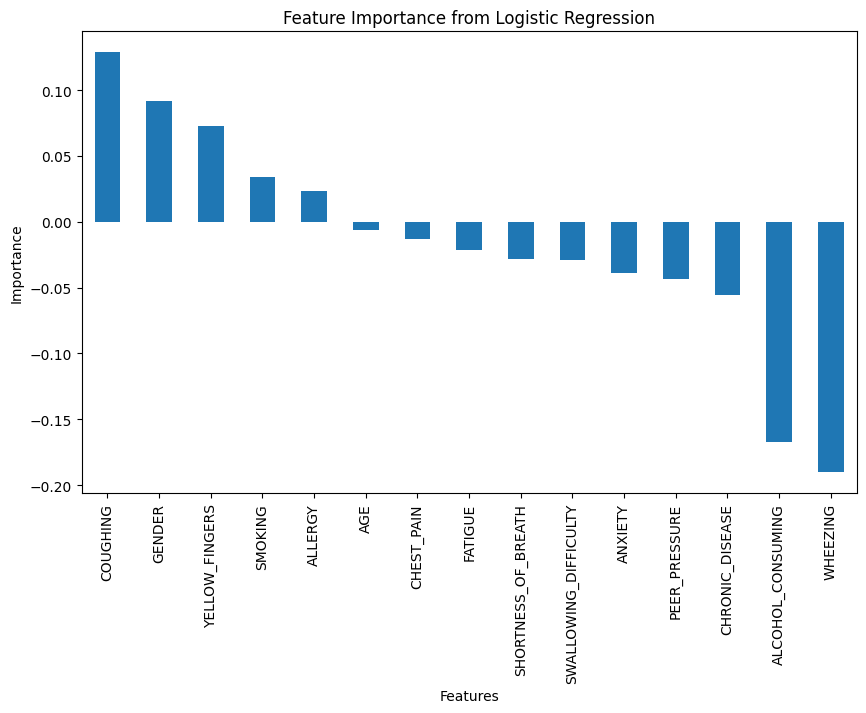

In [70]:

# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

''' 
    - Here we can see that the habits of smoking is most important for predicting lung cancer.
    - And Other significant features include chronic disease and symptoms like coughing, shortness of breath, and chest pain.
'''


In [ ]:

''' 
    - So Final Insights:
    - Smoking is a major risk factor for lung cancer.
    - Chronic Diseases is Significantly associated with higher lung cancer incidence.
    - Symptoms like Coughing, shortness of breath, and chest pain are strong indicators of lung cancer.
    - Here Demographics is that, Older age and male gender are associated with higher lung cancer incidence.
'''
